<a href="https://colab.research.google.com/github/lizzochek/AI-labs-python/blob/master/Lab_2_Dolhova_IP_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Алгоритм генерації графа: 
1. Задаємо кількість вершин
2. Створюємо порожній граф
3. Кількість вершин в ряду - корінь з кількості всіх  вершин  
4. Створюємо номери вершин за допомогою arange  (повертає числа з інтервалом 1)
5. Робимо reshape отриманих номерів, щоб мати двовимірний масив номерів вершин за рядами
6. Для кожного елемента отриманого масиву (вершини): 
      
      6.1 Номер вершини - номер ряда * порядок у ряду
      
      6.2 Додаємо вершину, вказуючи її номер та номер ряда як label 
      
      6.3 Для всіх вершин, крім крайнього правого стовпця додаємо ребро до наступної вершини (горизонтальні шляхи)
      
      6.4 Для всіх вершин, крім нижнього ряду, додаємо ребро до відповідної вершини наступного ряду (вертикальні шляхи)

7. Для позиціонування лініями використовуємо multipartite layout
8. Виводимо граф.


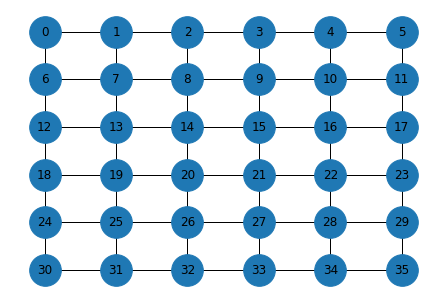

In [ ]:
import numpy as np;
import math;
import networkx as nx;

#1
num = 36;

#2
G = nx.Graph();
#3
row_range = int(math.sqrt(num));

#4
vertices = np.arange(0, num, 1)
#5
layers = vertices.reshape((row_range, row_range));

for i in range(row_range):
    for j in range(row_range):
        #6.1
        v = layers[j][i];    
        #6.2
        G.add_node(v, layer=i);
    
        #6.3
        if i != row_range - 1:
            G.add_edge(v, v+1);
        #6.4
        if v < num - row_range:
          G.add_edge(v, v + row_range);

#7
pos = nx.multipartite_layout(G, subset_key='layer');
#8
nx.draw(G, pos, node_size=1000, with_labels=True);

1. Зазначаємо кількість вершин для видалення
2. Встановлюємо кількість видалених вершин
3. Поки кількість видалених вершин менша за необхідну:

   3.1 Знаходимо випадкове ребро 

   3.2 Видаляємо це ребро

   3.3 Перевіряємо чи граф зв`язний

   3.4 Якщо зв`язний, видаляємо та змінюємо кількість видалених, якщо ні, повертаємо ребро у граф

4. Виводимо граф


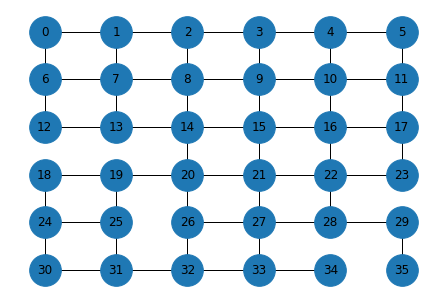

In [ ]:
import random

def remove_nodes(num: int = 5):
  #1
  to_remove_num = num;
  #2
  removed_num = 0;

  #3
  while removed_num < to_remove_num:
    #3.1
    edges = list(G.edges)
    random_edge = random.choice(edges)
    #3.2
    G.remove_edge(random_edge[0], random_edge[1]);
    #3.3
    connected = nx.is_connected(G);
    
    #3.4
    if connected:
      removed_num += 1;
    else:
      G.add_edge(random_edge[0], random_edge[1]);

remove_nodes(6);

nx.draw(G, pos, node_size=1000, with_labels=True);

Створення агента

Агент реалізовано у вигляді функції, що отримує граф, початкову та кінцеву точку, знаходить шлях між цими вершинами та розфарбовує ребра, що увійшли до шляху, ті, що були пройдені, але не підійшли та всі інші зеленим, червоним та синім відповідно.

Даний агент є цілоспрямованим (розрізняє, коли ціль досягнута), рефлекторним (обирає дії, базуючись на поточному сприйнятті середовища).

Алгоритм створення агента:



1.   Заздалегідь створюємо масив кольорів ребер графа
2.   Функція для пошуку вершини, що є за своїм номером найближчою до кінцевої:
    
  2.1 Спочатку мінімальну різницю номера вершин визначаємо як кількість вершин графа
   
  2.2 Серед усіх суміжних вершин, що ще не були відвідані, знаходимо модуль різниці з кінцевою вершиною. 
   
  2.3 Якщо ця різниця менша за поточну мінімальну відстань, вважаємо цю вершину найближчою

3. Функція - агент

  3.1 Встановлюємо початкову вершину поточною, наступною та відвіданою, порожній початковий шлях

  3.2 Поки поточна вершина не є кінцевою, знаходимо суміжні вершини
  
  3.3 Якщо серед суміжних вершин є кінцева, додаємо ребро у шлях, виводимо його та зупиняємось
  
  3.4 Знаходимо найближчу за номером вершину, яка буде наступною
  
  3.5 Якщо такої вершини немає, додаємо ребро у дорогу та повертаємось на крок назад 

  3.6 Якщо наступна вершина знайдена, додаємо ребро, що веде до неї від поточної, у шлях та виводимо його

  3.7 Додаємо нову вершину у відвідані та встановлюємо її поточною
  
  3.8 Коли шлях знайдено, розмальовуємо граф: якщо ребро у шляху - зеленим; якщо його проходили, але повернулись - червоним; інші - синім.

  4. Викликаємо агента та виводимо граф

Moving startes
[(21, 15)]
[(21, 15), (15, 9)]
[(21, 15), (15, 9), (9, 8)]
[(21, 15), (15, 9), (9, 8), (8, 7)]


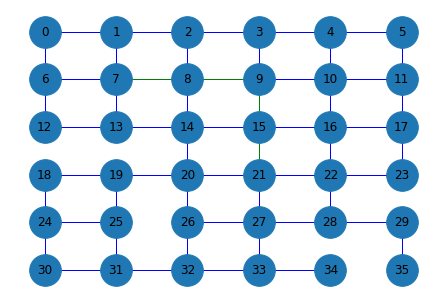

In [ ]:
#1
edge_colors = [];

#2
def find_closest_node(nodes: list, compare_with: int, visited_nodes: list, graph):
  #2.1
  min_difference = graph.number_of_nodes();
  closest_node = None;

  for node in nodes:
    if node not in visited_nodes: 
      #2.2
      dif_module = int(math.fabs(compare_with - node));
      #2.3
      if (dif_module < min_difference): 
        min_difference = dif_module;
        closest_node = node;
  return closest_node;

#3
def agent(start: int, end: int, G): 
  #3.1 
  current_position = start;
  visited_nodes = [start];
  next_node = start;
  road = [];

  print('Moving starts');
  while(current_position != end):   
    #3.2
    available_ways = list(G.neighbors(current_position));

    #3.3
    if end in available_ways:
      road.append((current_position, end));
      print(road);
      break;
    
    #3.4
    next_node = find_closest_node(available_ways, end, visited_nodes, G);

    if (not next_node):
      #3.5
      print('Going back');
      prev_index = visited_nodes.index(current_position);
      prev_node = visited_nodes[prev_index -1];

      road.append((current_position, prev_node));
      print(road);
      current_position = prev_node;
      continue;
    
    #3.6
    road.append((current_position, next_node));
    print(road);

    #3.7
    visited_nodes.append(next_node);
    current_position = next_node;

  #3.8
  for u,v in G.edges():
    if (u,v) in road and (v,u) in road:
        edge_colors.append('red');
    elif (u,v) in road or (v,u) in road:
        edge_colors.append('green');
    else: 
        edge_colors.append('blue');   
        
#4
agent(21, 7, G);

nx.draw(G, pos, edge_color=edge_colors, node_size=1000, with_labels=True);

Висновок:

У даній роботі було розроблено інтелектуальний агент у вигляді функції, що знаходить шлях від одної вершини графа до іншої, враховуючи тільки поточний стан.